<a href="https://www.kaggle.com/code/ibrahimfe/face-mask-classification-with-svm?scriptVersionId=154926569" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [46]:
import pylab as pl
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC

In [47]:
DATA_TRAIN = '/kaggle/input/face-mask-types-dataset/Dataset/train'
DATA_TEST = '/kaggle/input/face-mask-types-dataset/Dataset/test'
CATEGORIES = ['cloth', 'n95', 'n95v', 'nfm', 'srg']
IMG_SIZE = 50

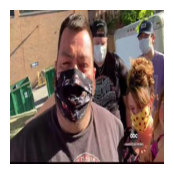

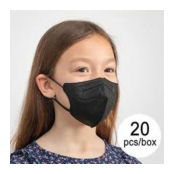

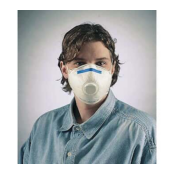

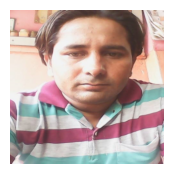

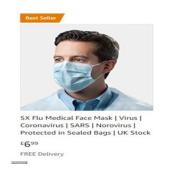

In [48]:
count = 0
for category in CATEGORIES:
    path=os.path.join(DATA_TRAIN, category)
    plt.figure(figsize = (2,2))
    for img in os.listdir(path):
        bgr_image=cv2.imread(os.path.join(path,img))
        rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
        plt.axis('off')
        plt.imshow(rgb_image)
        
        break
    count += 1
    if count > 4:
        break

In [57]:
data_arr = []
target_arr = []
test_data_arr = []
test_target_arr = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_TRAIN, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                rgb_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                img_resized = cv2.resize(rgb_image,(IMG_SIZE,IMG_SIZE))
                img = np.array(img_resized).flatten()
                data_arr.append(img)
                target_arr.append(class_num)
            except Exception as e:
                pass
def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_TEST, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                rgb_image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                img_resized = cv2.resize(rgb_image,(IMG_SIZE,IMG_SIZE))
                img = np.array(img_resized).flatten()
                test_data_arr.append(img)
                test_target_arr.append(class_num)
            except Exception as e:
                pass
create_training_data()
create_test_data()

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [58]:
print(len(data_arr))
print(len(test_data_arr))

1956
330


In [59]:
data = np.array(data_arr)
target = np.array(target_arr)
test_data = np.array(test_data_arr)
test_target = np.array(test_target_arr)

In [60]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
norm_images = scaler.fit_transform(data)
norm_test_images = scaler.transform(test_data)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_images,target, train_size=0.9)
print('Splitted Succesfully')

Splitted Succesfully


In [62]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
augmented_images = []
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')
for original_image in norm_images:
    # Expand dimensions to create a batch of one image
    original_image = np.reshape(original_image,(IMG_SIZE, IMG_SIZE, 3))
    original_image = np.expand_dims(original_image, axis=0)
    
    # Generate augmented images
    augmented_data = datagen.flow(original_image, batch_size=1)
    
    # Extract augmented image from the generator
    augmented_image = augmented_data.next()[0]
    
    # Append augmented image to the list
    augmented_images.append(augmented_image)
augmented_images = np.array(augmented_images)
augmented_images_arr = np.concatenate((augmented_images, norm_images.reshape(-1, IMG_SIZE, IMG_SIZE, 3)))

In [63]:
augmented_images2 = []
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
for original_image in augmented_images:
    # Expand dimensions to create a batch of one image
    original_image = np.reshape(original_image,(IMG_SIZE, IMG_SIZE, 3))
    original_image = np.expand_dims(original_image, axis=0)
    
    # Generate augmented images
    augmented_data = datagen.flow(original_image, batch_size=1)
    
    # Extract augmented image from the generator
    augmented_image = augmented_data.next()[0]
    
    # Append augmented image to the list
    augmented_images2.append(augmented_image)
augmented_images2 = np.array(augmented_images2)
augmented_images_arr = np.concatenate((augmented_images2, augmented_images_arr))

In [65]:
augmented_images1 = []
datagen = ImageDataGenerator(
    horizontal_flip=True, 
    vertical_flip=True)
for original_image in augmented_images2:
    # Expand dimensions to create a batch of one image
    original_image = np.reshape(original_image,(IMG_SIZE, IMG_SIZE, 3))
    original_image = np.expand_dims(original_image, axis=0)
    
    # Generate augmented images
    augmented_data = datagen.flow(original_image, batch_size=1)
    
    # Extract augmented image from the generator
    augmented_image = augmented_data.next()[0]
    
    # Append augmented image to the list
    augmented_images1.append(augmented_image)
augmented_images1 = np.array(augmented_images1)
augmented_images_arr = np.concatenate((augmented_images1, augmented_images_arr))
reshaped_aug_arr = augmented_images_arr.reshape(len(augmented_images_arr), -1)
reshaped_aug_arr.shape

(7824, 7500)

In [66]:
target_aug = np.concatenate((target, target, target, target))

In [68]:
target_aug.shape

(7824,)

In [69]:
import time
from sklearn.svm import SVC

# Latih model SVM dengan data yang diperoleh
start_time = time.time()
model = SVC(kernel='rbf', gamma='scale', C=10, class_weight='balanced')
model.fit(reshaped_aug_arr, target_aug)
print("Finished Training Model")

end_time = time.time()

# Hitung lama waktu training
training_time = end_time - start_time
print("Training time: {} seconds".format(training_time))

Finished Training Model
Training time: 360.0114948749542 seconds


In [70]:
trained = model.predict(norm_images)
validation = model.predict(norm_test_images)

In [71]:
from sklearn.metrics import accuracy_score
print("Data Train Accuracy is", accuracy_score(target,trained) * 100)
# print("Data Test Accuracy is",accuracy_score(y_test,predicted) * 100)
print(f"Accuracy of valid data is {accuracy_score(test_target, validation) * 100}")

Data Train Accuracy is 99.84662576687117
Accuracy of valid data is 70.60606060606061


In [73]:
from sklearn.metrics import classification_report
print(classification_report(target, trained, target_names=CATEGORIES))

              precision    recall  f1-score   support

       cloth       1.00      1.00      1.00       396
         n95       0.99      1.00      1.00       354
        n95v       1.00      0.99      1.00       390
         nfm       1.00      1.00      1.00       474
         srg       1.00      1.00      1.00       342

    accuracy                           1.00      1956
   macro avg       1.00      1.00      1.00      1956
weighted avg       1.00      1.00      1.00      1956



In [74]:
print(classification_report(test_target, validation, target_names=CATEGORIES))

              precision    recall  f1-score   support

       cloth       0.69      0.62      0.65        78
         n95       0.67      0.56      0.61        50
        n95v       0.72      0.67      0.69        49
         nfm       0.77      0.83      0.80        78
         srg       0.67      0.79      0.72        75

    accuracy                           0.71       330
   macro avg       0.70      0.69      0.70       330
weighted avg       0.70      0.71      0.70       330



In [75]:
import pandas as pd
result = pd.DataFrame({'original' :target,'predicted' : trained})
result

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1951,4,4
1952,4,4
1953,4,4
1954,4,4


In [76]:
result = pd.DataFrame({'original' : y_test,'predicted' : predicted})
result

,original,predicted
0,0,2
1,3,3
2,4,4
3,1,1
4,2,2
...,...,...
191,1,3
192,2,4
193,1,1
194,4,0


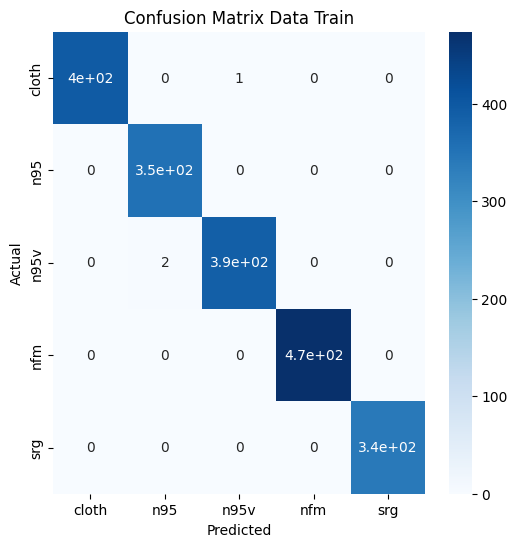

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(target, trained)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['cloth', 'n95', 'n95v', 'nfm', 'srg'], yticklabels=['cloth', 'n95', 'n95v', 'nfm', 'srg'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Data Train')
plt.show()

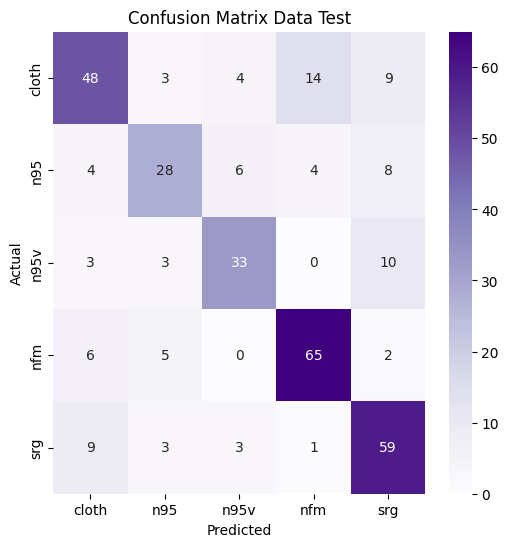

In [79]:
cm = confusion_matrix(test_target, validation)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Purples', xticklabels=['cloth', 'n95', 'n95v', 'nfm', 'srg'], yticklabels=['cloth', 'n95', 'n95v', 'nfm', 'srg'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Data Test')
plt.show()

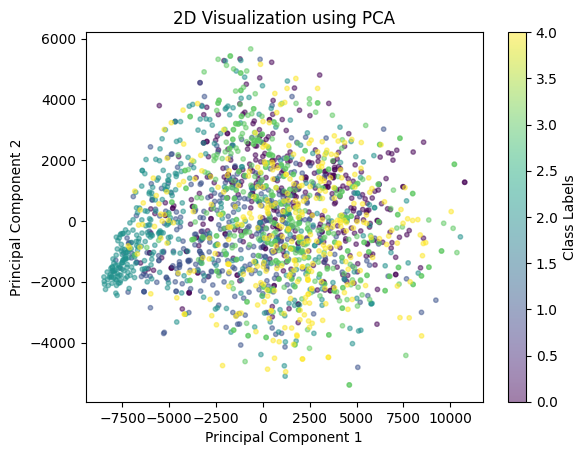

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)


# Plot the reduced-dimensional data
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis', marker='o', s=10, alpha=0.5)
cbar = plt.colorbar(scatter)
cbar.set_label('Class Labels')

plt.title('2D Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()